# **Understanding EVENT-DRIVEN molecular dynamics simulation on a simple toy model**

The ultimate goal is to write an event-driven molecular dynamics simulation for a two-dimensional hard sphere system in a rectangular simulation box with hard walls. We can also say in simple words, we want to simulate a billiard system without friction and purely ellasitc collisions, i.e. the kinetic energy $E_{\rm kin} = \sum_i \frac{m_i}{2} |\vec{v_i}|^2$ and the momentum $p = \sum_i m_i \vec{v_i}$ are conserved.  See below two illustrations of our goal.  

<figure class="image">
  <img src='https://image.api.playstation.com/vulcan/img/rnd/202102/1612/c0xiIu9ukku0YbOtrsR4h7AU.png?w=440' alt="{{ include.description }}" alt="drawing" width="400"/>
  <img src='https://drive.google.com/uc?id=1SbqARrw5KdnLNyGaROCT-mwO4hI6e2st' alt="drawing" width="400"/> 
  <figcaption>
 

To understand the basic idea of the event-driven simulation we consider a simple toy model.  
The toy model consits of a self-driving car on an empty high way. The car drives with constant speed $v_{\rm car}$ and the speed corresponds exactly to the one indicated by the speed-limit signs on the high way. Furthermore, the car keeps track of its own position $x_{\rm car}$. For simplicity, we consider only $v_{\rm car}>0$.  

<img src='https://evs-profilepics.s3.amazonaws.com/production/cdr/images/attachments/000/006/119/original/0123cH.jpg?1543307886'>

Every time the car passes a new speed-limit sign the following things happen:
1.   The car adapts instantaneously its speed $v_{\rm car}$ to the indicated limit.
2.   The car gets the information about the position $x_{\rm speed}$ of the next speed limit sign (where obviously $x_{\rm speed} > x_{\rm car}$).
3.   With the two new information $v_{\rm car}$, $x_{\rm speed}$, and the current position $x_{\rm car}$, the car computes the remaining time $\Delta t_{\rm event}$ until the next "event" of passing a speed limit sign.
4.   The car drives with its new constant speed for the time span of exactly $\Delta t_{\rm event}$, after which it arrives at the next speed sign! $\rightarrow$ go to 1.

We consider passing a speed-limit sign as an **EVENT**. An **EVENT** has an impact on the **VELOCITY** of the car, i.e. it will **change the way it moves**. 

---> Now we ask:   
What is the most efficient strategy to simulate this self-driving car?  
---> The answer is:  
An **event-driven simulation**, which bases on the idea to evolve the system (here the the self-driving car) from **EVENT TO EVENT** (i.e. from speed sign to speed sign). 

**For the self-driving car, the basic idea of the simulation loop is as follows:**
1.   Evolve the trajectory until the time of the next event: $x_{\rm car}(t+ \Delta t_{\rm event}) =  x_{\rm car}(t) + v_{\rm car} * \Delta t_{\rm event}$ .  
(In consequence, the time has evolved now, thus "$t = t + \Delta t_{\rm event}$".)
2.   Get the information about the new velocity and adapt the velocity: $v_{\rm car} = v_{\rm sign}$. 
3.   Get the information about the position of the next speed limit sign $x_{\rm speed}$ and calculate the remaining time until the next event: $\Delta t_{\rm event}$.
4. Go back to point 1

This is great and it makes sense! We have an efficient simulation, which correctly captures at what time the car satisfies $x_{\rm car}(t) = x_{\rm speed}$ and hence changes velocity.   


However,  we ignore all the positions of the car inbetween two speed limit sings. Is that correct ? Maybe we could miss something ? The loop above simulates the car positions from *event to event*, i.e. from *speed sign to speed sign*. This is the key assumption here: nothing happens between two events that we cannot predict given what we know. 


We could for example imagine, that the car is supposed to send its GPS position for tracking purpose in constant time intervals $dt$.  
**The question is: How do we have to modify this event-driven loop (in the most efficient way), such that the car sends its position in constant time intervalls $dt$?**



------ Let's first define some constants:

In [ ]:
import numpy as np

N_GPS_signals = 100 # total number of GPS signals we want to simulate
dt_of_GPS = 5.0
times_list_of_GPS_signals = np.arange(dt_of_GPS, dt_of_GPS*N_GPS_signals, dt_of_GPS)

print("The car is supposed to send its position at the following times:\n", times_list_of_GPS_signals)

------ The code below is the event-driven simulation of the car.  

**Your taks is:** modify the code such that the car position evolves in constant time intervals $dt$ **without modifying the event-driven simulation loop** that we defined above.  

**The key idea is:** the desired purpose of the for-loop is to evolve the trajectory (and time) in time steps $dt$. Therefore, the code belonging to the event-driven simulation loop should be executed only if (and as long as) there is an event in between two GPS signals.

How to know if your solution is correct?    
1.   There are two times printed in the for loop. The first comes from the variable "current_time" and the second from the variable "GPS_time". The goal is to adapt the code, such that "current_time" is the same as "GPS_time". **You are NOT allowed to change "GPS_time"**.
2.   If you succeeded in 1, then the second test is that your final output is:  
     Final total time &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 495.0  
     Final car position &nbsp;&nbsp; 203.05417649165017  
     Final car speed &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 0.04233038234430997

Please ask a teaching staff to check your code before you proceed. **This loop of an event-driven simulation in constant time steps will be ESSENTIAL for the actual project.**

**Remark:** In the language of a code developer we are performing a **unit test**. This means we write a unit, which will be part of our final project and test it in a simple yet realistic setup. If we are programming a big project, it is always advisable to split it in small steps that we can test. Ideally every  routine/function we write (can be as short as one line) must be tested before its integration in our big project ! We verify that it does what we think it should do. This is a good coding practice !  

**Remark 2:** The variable "future_time_speed_change" is 

In [ ]:
np.random.seed(10)# this is for debugging

# we intialize the system at t = 0
current_time = 0.0
car_position = 0.0
car_speed = 1.0
position_next_speed_limit = car_position + np.random.uniform(0,5)

# before entering the event-driven loop, we initialize the loop parameters
dt_till_speed_change = (position_next_speed_limit - car_position) / car_speed
future_time_speed_change = current_time + dt_till_speed_change

for GPS_time in times_list_of_GPS_signals:
    #time at which GPS signal should be transmitted
    future_time_next_GPS_signal = current_time + dt_of_GPS

    ''' START EVENT-DIRVEN SIMULATION LOOP
    You are not allowed to change the code,
    but you can change the intendation.'''
    #1. move car till next speed limit and update current_time
    car_position += car_speed * dt_till_speed_change
    current_time = future_time_speed_change
    #2. change the speed and find distance to next speed limit
    car_speed = np.random.uniform(0,2)
    position_next_speed_limit = car_position + np.random.uniform(0,5)
    #3. calculate dt to reach next limit and get the time at which car will reach the limit
    dt_till_speed_change = (position_next_speed_limit - car_position) / car_speed
    future_time_speed_change = current_time + dt_till_speed_change
    ''' END EVENT-DIRVEN SIMULATION LOOP'''

    print("we send a GPS signal at time \t%.5f\nbut it should be send at \t%.5f\n" % (current_time, GPS_time))

print("Final total time \t", current_time)
print("Final car position \t", car_position)
print("Final car speed \t", car_speed)

# **Generalization to N particles**

To simulate a single particle (or a single car) is not super interesting. Typically we are interested in the **collective phenomena**, i.e. what happens if the system does not only contain one, but many particles! For more complex systems than our toy model, one could ask the question if there is a critical density, above which the cars produce traffic jams, etc.  

Luckily we can still exploit the efficient idea of event-driven simulations for a system with $N$ particles. The loop of event-driven simulation changes only slighlty. Furthermore, our solution of an event-driven simulation **in constant time steps** is **universal and remains unchanged**.

## Working principle explained on the toy model of N cars
To explain how the loop of the event-driven simulation needs to be adapted, we first remain in the picture of our simple toy model and consider a system of $N$ cars, with: 
*   random inital positions $\{ x_1, x_2, ..., x_N\}$, where $x_i \ne x_j$ for $j\ne i$
*   the initial velocities $\{ v_1, v_2, ..., v_N\}$ are set by the corresponding speed limit of the initial position
*   every car "knows" the position of the next speed limit sign on its trajectory $\{ x_{\rm speed,1}, x_{\rm speed,2}, ..., x_{\rm speed,N}\}$


**Important:** With this random initial positions, it is important to realize that it will **never** happen that two cars pass a speed limit sign exactly at the same moment: two events cannot be simultaneous.  There will **always** be a time difference between two events (even if this difference might be very small). **This is an essential assumption for the algorithm we consider in this course.**  
The consequence of this is: **There is always only one car involved in an event, hence only the velocity of one car changes during an event. The non-involved cars, continue to move with their constant speed.**

With these additional considerations, we can write down the basic idea of the simulation loop for $N$ cars, knowing $\Delta t_{\rm event}$, the time lapse before the next event:
1.   Evolve the trajectories of **all** cars until the time of the next event: $x_i(t+ \Delta t_{\rm event}) =  x_i + v_i * \Delta t_{\rm event}$ .  
(In consequence, the time has now evolved, thus "$t = t+ \Delta t_{\rm event}$".)
2.   Get the information about the new velocity **for the car which is involved in the event** (denoted the event car for brevity) and adapt the velocity: $v_{\rm event \,car} = v_{\rm sign}$.  
Also update the position of the next speed limit sign $x_{speed}$ **for the event car**.
3.   Given the updated lists of car positions $\{x_i\}$, car velocities $\{v_i\}$ and positions of speed limit signs $\{x_{\rm speed,\, i}\}$, we calculate the remaining time until the next event **for every single car**. Amongst those times, find **the event** which is the closest in the future, i.e. the one with the smallest $\Delta t_{\rm event}$.
4.   Go back to 1

Remark: In point 3. we have to find **the event** which is the closest in the futre, which means not only the time $\Delta t_{\rm event}$, but also the index of the car which is involved in the event. Otherwise we do not know which car should get a new velocity (and $x_{\rm speed}$) in step 2.

**Before we proceed, make sure you understood the idea of the loop for the event-driven simulation.** Do not hesitate to ask questions!

# Event-driven molecular dynamics simulation of N hard spheres confined by rectangular hard walls.

With the insigths we got from the toy model, it is now straightforward to understand the working principle of an event-driven molecular dynamics simulation of hard disks which are confined inside a rectangular box of hard walls. Our goal is to consider not only monomers, but also dimers (a pair of monomers, that cannot be further appart than their maximum bond length). You can see an animation of the system below.  
To reach there we will go step by step and you will work in a team. In the end of this notebook you can find a road map to guide your work.
<img src='https://drive.google.com/uc?id=1c1KLtxvKZYIWV2SL-ru9EYn0nGvbqCm4' alt="{{ include.description }}" alt="drawing" width="800"/>

*********************************
### Hard disk and potential
In the rest of the lab session, we will consider a problem in 2 dimensions. The position of the particle $i$ is now denoted by  a vector 
$\vec{r}_i$ in $\mathbb{R}^2$. 

Side note: In physics, a **hard disk** describes particles with the potential  
$U (r_{ij}) = \begin{cases}0,\, {\rm if }\,r_{ij} > (R_i+R_j)\\ \infty,\, {\rm otherwise }\end{cases}$,  
where $r_{ij} = ||\vec{r}_i-\vec{r}_j||$ the inter-particle distance and with $R_i$ the radius of the particle $i$ (or $j$ respectively). In words this means that particles have a certain radius and those particles **cannot overlap** because this costs an infinite energy.  
Equivalently, the minimal distance between a hard disk and a **hard wall** is the radius of the disk. An overlap with the wall would cost infinite energy.
*********************************

### Monomers and Dimers

We explain the working principle on the case of **MONOMERS**. You should be able to generalize the algorithm to **DIMERS** yourself.  

We want to simulate a system in which every hard disk/monomer indexed by $i$ moves with a **constant velocity** $\vec{v_i}$ until it collides with either another disk, or with the confining walls. All collisions are treated as [perfect elastic collitions](https://en.wikipedia.org/wiki/Elastic_collision), i.e. the overall kinetic energy $E_{\rm kin} = \sum_i \frac{m_i}{2} |\vec{v_i}|^2$ and the total momentum $p = \sum_i m_i \vec{v_i}$ are conserved quantities.  
Keeping our toy model in mind, we identify the elastic collisions as **EVENTS**, because they **change the velocity** of the involved particles and hence the way they move.  
An event-driven molecular dynamics simulation of hard disks bases therefore on the idea to evolve the system **from collision to collision**.


We consider again **randomly distributed initial positions** $\{\vec{r_1},\vec{r_2},... ,\vec{r_N}\}$ inside the hard-wall box (now, however, with the additional condition that there are **NO OVERLAPS** between individual disks and between a disk and the hard walls).  
This initialization ensures that it is **impossible** that two collision events take place at exactly the same time. In consequence the nature of a **collision event** is either:
1.   a collision between **one disk** with one of the 4 confining walls, or
2.   a collision between **two disks**.

In our toy model, we followed always the same update rule for the velocity at the event, i.e. adapt the speed to the one indicated on the speed limit sing. In the hard-disk system, **the update rule of the velocity depends on the kind of the event**, i.e. we use different equations for wall collisions and for inter-particle collision. (We derive the equations later.)  

Another essential quantity of the event-driven loop was the remaining time $\Delta t_{\rm event}$ until the next event. For the hard-disk system, also the equations for **$\Delta t_{\rm event}$ depend on the event kind**, i.e. wall collision or inter-particle collision. (Again, we derive the equations later.)  

### Event-driven simulation for N particles

With this considerations, we can now write down the principle idea of the event-driven simulation loop:

1.   Evolve the trajectories of **all** particles until the time of the next event: $\vec{r_i}(t+ \Delta t_{\rm event}) =  \vec{r_i}(t) + \vec{v_i}(t) * \Delta t_{\rm event}$.  
(In consequence, the time has now evolved, thus "$t = t+ \Delta t_{\rm event}$".)
2.   Compute the new velocities **for the particles involved in the collision**. The computation will **depend on the event kind**:  
$\rightarrow$ if (event kind == wall): update velocity of **one** particle following the "wall update rule"
$\rightarrow$ else: update the velocities of **two** particle following the "inter-particle update rule"
3.   Given the updated lists of particle positions $\{\vec{r_i}\}$ and the updated velocities $\{\vec{v_i}\}$ we identify the **collision event** with the smallest $\Delta t_{\rm event}$.
4.   Go back to 1

The result of the event-driven simulation loop looks like the following animation, where we took a snapshot of the system before and after the update of the velocity (i.e. one snapshot after step 1 and one snapshot after step 2).  
<img src='https://drive.google.com/uc?id=1b0pVXT-WF1oc-6aReWaYs_6f7mTrKQq7' alt="drawing" width="600"/>  
The time does not evolve in constant time steps in the animation above.  

Just like for the toy model, our goal is a simulation in constant time steps $dt$ without loosing the efficiency (and precission) of the event-driven simulation loop.  
Luckily the solution you found for our toy model is universal and you can recycle it here to obtain an animation like the following animation. You see on top of the simulation box, that time evolves now in constant time steps $dt = 0.05$, which makes the animation appear fluid (like a movie).  
<img src='https://drive.google.com/uc?id=1SbqARrw5KdnLNyGaROCT-mwO4hI6e2st' alt="drawing" width="600"/>  
The idea is again to evolve the trajectories in constant time steps $dt$. At every $dt$ we take a snapshot/picture of the system. The event-driven simulation loop should be executed only if (and as long as) there is an event between $t$ and $t+dt$.  
The video is then obtained from the snapshots.  

**Remark:** Is it important to have a simulation in constant time steps?  
$\Rightarrow$ Yes, it is! $\Leftarrow$   
Forget about the video! The video is "just playing". Consider the system as a real physical system in which you want to take measurements. We could imagine for example:
* We are interested in measuring some quantity as a function of time.
* We want to get the average value of some quantity.  

For the first case, the importance of a simulation in constant time steps is obvious.  
However,  a simulation in constant time steps is essential also for averaged quantities. Imagine for example we want to measure the average minimum distance between particles. If our simulation is not correct and we take for instance also snapshots at the time of the collision events, then this quantity would be simply wrong. We would not measure a physical feature of the system, but just some artifact of our algorithm.  
$\rightarrow$**In conclusion:** the collision events are "only" what makes our algorithm work. All measurements should be performed in constant time steps, i.e. when we take a snapshot of the system.

**Question:** Imagine we simulate a really big system with millions of particles and take snapshots in constant time steps. Is it possible that one of the snapshots shows the precise moment of a collision, i.e. when $||\vec{r_i}-\vec{r_j}|| = R_i+R_j$ (here, $R_i$ and $R_j$ are the radius of two particles $i$ and $j$)? Again, we consider random initial positions!

## Step 2: Velocity updates
We focus now on step 2 of the event-driven simulation loop, i.e. the velocity update of the particles **involved in the event**. Remember, there are two cases: update after a wall collision, and update after an inter-particle collision.


### 2a) Velocity update for particle-wall collisions
The first case reduces to the most simple kind of elastic collisions, i.e. an [elastic collison of a one-dimensional](https://en.wikipedia.org/wiki/Elastic_collision#One-dimensional_Newtonian) particle with an infinitely heavy object. From high school we remember that in this case the update rule is simply $v' = -v$, with $v$ the velocity before the collision, and $v'$ the velocity after the collition. Because we are considering a two-dimensional particle system, we have to consider two cases:
*   if the collision involves a vertical wall (in x-direction) $\rightarrow v_x' = -v_x$
*   if the collision involves a horizontal wall (in y-direction) $\rightarrow v_y' = -v_y$

**What are the required information to update the velocity after a wall collision?**  
- i) The index $i$ of the particle involved in the collision.  
- ii) The direction of the wall, i.e. in x- or in y-direction.  
**The basic idea of the velocity update looks like this:**

In [ ]:
# the array with v_x and v_y for all particles
vel = np.array( [[ 1.1,-0.4], [0.3,0.7], [-0.43, -0.669]] )

i = 1 # index of colliding particle
w_dir = 0 # collision with wall in x direction

print("(v_x, v_y) of particle %d BEFORE the collision: (%.4f, %.4f)" % (i, vel[i][0], vel[i][1]))

vel[i][w_dir] *= -1

print("(v_x, v_y) of particle %d AFTER the collision: (%.4f, %.4f)" % (i, vel[i][0], vel[i][1]))

### 2b) Velocity update for inter-particle collisions 
For [two-dimensional elastic collisions of two moving objects](https://en.wikipedia.org/wiki/Elastic_collision#Two-dimensional_collision_with_two_moving_objects), the [derivation](https://williamecraver.wixsite.com/elastic-equations) of the update rule for the velocities is "slightly longer", but bases soley on the conservation of kinetic energy and momentum.    
We define the vectorial distance between the collision partners (see image below)  

$\vec{\delta}(t_{\rm coll})=\vec{r_2}(t_{\rm coll}) - \vec{r_1}(t_{\rm coll})$  

and the corresponding unit vector  

$\widehat{\vec{\delta}}(t_{coll})=\frac{\vec{\delta}}{||\vec{\delta}||}$.  

(Property of $\widehat{\vec{\delta}}$: It is perpendicular to the contact plane.)  

We furthermore define the difference between the velocities  

$\vec{\Delta v} = \vec{v_1}-\vec{v_2}$.

*Note the inverse order of particle 1 and 2 in the expressions for $\vec{\delta}(t_{\rm coll})$ and $\vec{\Delta v}$!*

With this two quantities we define the update rule as follows  

$\vec{v_1}' = \vec{v_1}- \frac{2m_2}{m_1+m_2}\left( \widehat{\vec{\delta}}\cdot \vec{\Delta v}\right)\widehat{\vec{\delta}}$ and  

$\vec{v_2}' = \vec{v_2}+ \frac{2m_1}{m_1+m_2}\left( \widehat{\vec{\delta}}\cdot \vec{\Delta v}\right)\widehat{\vec{\delta}}$.

<figure class="image">
  <img src='https://drive.google.com/uc?id=1yOyj8UUNOV15LWio_2z2GAJYzbPNNX-1' alt="{{ include.description }}" alt="drawing" width="400"/>
  <figcaption>Definition of $\vec{\delta}(t_{\rm coll}) = \vec{r_2} - \vec{r_1}$ and $\vec{\Delta v} = \vec{v_1}-\vec{v_2}$. </figcaption>
</figure>

**Required information to update the velocy after an inter-particle collition:**  
i) The index $i$ of **the first particle** involved in the collision.  
ii) The index $j$ of **the second particle** involved in the collision.  
**With the indeces, we can access all information needed.**  
We do not write the complete function here, but just the principle idea of the data structure. (**Later** you can perform your unit test here.)

In [ ]:
vel = np.array( [[ 1.1,-0.4], [0.3,0.7], [-0.43, -0.669]] ) #velocities
pos = np.array( [[ 1.0, 1.0], [ 1.0, 2.0], [ 4.0, 5.5]] ) #positions
mass = np.array( [ 1.0, 1.0, 1.0] ) #all three particles have the same mass

p_1 = 1 # index of collision partner number 1
p_2 = 0 # index of collision partner number 2

del_pos = pos[p_2] - pos[p_1]
#... more code
del_vel = vel[p_1] - vel[p_2]
#... more code
print("we computed r_2 - r_1: ", del_pos)
print("we computed v_1 - v_2: ", del_vel)

## Step 3: Identification of the next event

In the $3^{\rm rd}$ step of the event-driven simulation loop we have to **identify the event** with the smallest $\Delta t_{\rm event}$. 


Remember! :  
- In step 1, we need the information about $\Delta t_{\rm event}$ to update all trajectories until the moment of the event.  
- In step 2, we need to update the velocites of the particles involved in the event. We have just seen that the velocity update requires some information.  

We see that **identifying the next event** is more complex than simply searching for the smalles $\Delta t_{\rm event}$. Therefore, before specifying the details of step 3, we construct the tools which allow us to write a clean/readable code!  


### 3a) The event class
A good way to handle all the information describing an event, is to write a "CollisionEvent" object as the one below.

In [ ]:
class CollisionEvent:
    """
    Object contains all information about a collision event
    which are necessary to update the velocity after the collision.
    For MD of hard spheres (with hard bond-length dimer interactions)
    in a rectangular simulation box with hard walls, there are only
    two distinct collision types:
    1) wall collision of particle i with vertical or horizontal wall
    2) external (or dimer bond-length) collision between particle i and j
    """
    def __init__(self, Type = 'wall or other', dt = 0, m_1 = 0, m_2 = 0, w_dir = 1):
        """
        type = 'wall' or other
        dt = remaining time until collision
        m_1 = index of monomer
        m_2 = if inter-particle collision, index of second monomer
        w_dir = if wall collision, direction of wall
        (   w_dir = 0 if wall in x direction, i.e. vertical walls
            w_dir = 1 if wall in y direction, i.e. horizontal walls  )
        """
        self.Type = Type
        self.dt = dt
        self.m_1 = m_1
        self.m_2 = m_2  # only importent for interparticle collisions
        self.w_dir = w_dir # only important for wall collisions
        
        
    def __str__(self):
        if self.Type == 'wall':
            return "Event type: {:s}, dt: {:.8f}, p1: {:d}, wall in direction (0 for x, 1 for y): {:d} ".format(self.Type, self.dt, self.m_1, self.w_dir)
        else:
            return "Event type: {:s}, dt: {:.8f}, p1: {:d}, p2: {:d}".format(self.Type, self.dt, self.m_1, self.m_2)

This "CollisionEvent" object provides a way to store all the required information for the velocity update in one variable. You can see below an example of how to use the "CollisionEvent" object.

In [ ]:
next_wall_event = CollisionEvent( Type = 'wall', dt = 0.5, m_1 = 10, w_dir = 0)
next_monomer_event = CollisionEvent( Type = 'monomer', dt = 0.2, m_1 = 3, m_2 = 4)
print(next_wall_event)
print(next_monomer_event)

if ( next_wall_event.dt < next_monomer_event.dt):
  next_event = next_wall_event
else:
  next_event = next_monomer_event

print("*******\nThe next event is:\n ", next_event )

With this we can write in a very clean way the update for the velocities:

In [ ]:
if next_event.Type == 'wall':
  p1 = next_event.m_1
  wall_dir = next_event.w_dir
  print("we have to update vel[p1][wall_dir] = vel[%d][%d]" % (p1, wall_dir))
else:
  p1 = next_event.m_1
  p2 = next_event.m_2
  print("we have to update the velocities vel[p1] = vel[%d] and vel[p2] = vel[%d]" % (p1, p2))

### 3b) Details for step 3
Now that we have this event object to our disposal we can describe in detail the $3^{\rm rd}$ step of the event-driven simulation loop. So, how should we proceed to **identify the next event**?  

Remember, we keep track of:
*   The list of all particle positions  
```
pos = np.array( [ [px0, py0], [px1, py1], ...])
```
*   The list of all particle velocities  
```
vel = np.array( [ [vx0, vy0], [vx1, vy1], ...])
```
*   The list of all particle raidi  
```
rad = np.array( [ r0, r1, ...])
```
*   The location of the left and lower wall
```
BoxLimMin = np.array( [ L_xMin, L_yMin] )
```
*   The location of the right and upper wall
```
BoxLimMax = np.array( [ L_xMax, L_yMax] )
```

Routine to **identify the next event**:
*   We calculate first all possible wall collisions and store them in a list. We then **identify the next WALL event** in this list (i.e. one with the **smallest** $\Delta t_{\rm event}$) and store the **event information** in the object **next_wall_event**.
```
next_wall_event.dt = del_t_till_wall_collision
next_wall_event.m_1 = index_of_involved_particle
next_wall_event.w_dir = direction_of_wall
```
*   We calculate all possible inter-particle collisions and store them in a list. We then **identify the next INTER-PARTICLE event** in this list (i.e. one with the **smallest** $\Delta t_{\rm event}$) and store the event information in the object **next_monomer_event**.  
```
next_monomer_event.dt = del_t_till_particle_collision
next_monomer_event.m_1 = index_of_involved_particle_1
next_monomer_event.m_2 = index_of_involved_particle_2
```
*   We then compare the event times, and choose the one with the smallest $dt$ as **next_event**  
```
if ( next_wall_event.dt < next_monomer_event.dt):
        next_event = next_wall_event
else:
        next_event = next_monomer_event
```



We now derive the equations for the remaining time until a collision event $\Delta t_{\rm event}$
### 3b-1) particle-wall collision time

Thanks to the [superposition principle](https://en.wikipedia.org/wiki/Superposition_principle#:~:text=The%20superposition%20principle%2C%20also%20known,caused%20by%20each%20stimulus%20individually.), the problem of computing the remaining wall collision time $\Delta t_{\rm event}$ simplifies to a one-dimensional problem as illustrated in the figure below.  
<img src='https://drive.google.com/uc?id=1GN045Cv14-8JMGQwBEgi-7j47Uz7x1cr' alt="{{ include.description }}" alt="drawing" width="800"/>  
As shown in the figure, the collision condition with the **upper wall** is  

$y(t+\Delta t_{\rm event}) = L_{\rm y,max} - R$,

where $R$ the radius of the particle. Furthermore, the particle follows the equation of motion  

$y(t+\Delta t_{\rm event}) = y(t) + v_y\Delta t_{\rm event} $.

Solving for $\Delta t_{\rm event}$ thus gives  

$\Delta t_{\rm event} = \frac{\left(L_{\rm y,max} - R\right) - y(t)}{v_y}$.

Note that the collision condition with the **lower wall** is different, thus the solution for $\Delta t_{\rm event}$ must be adapted.

### 3b-2) inter-particle collision time 
We are given the positions and velocities of two particles at any time $t_0$:  

$\vec{r_1}(t_0)$, $\vec{r_2}(t_0)$  
$\vec{v_1}(t_0)$, $\vec{v_2}(t_0)$.

In addition, we know the radiai $R_1$ and $R_2$ of the respective particles.
The particle positions follow the equations of motion (until the next collision event changes the velocities)

$\vec{r_1}(t_0+\Delta t) = \vec{r_1}(t_0) + \vec{v_1} \Delta t$  

$\vec{r_2}(t_0+\Delta t) = \vec{r_2}(t_0) + \vec{v_2} \Delta t$.   


At any monent in time, we can define the distance between the two particles as   

$\delta(t) = \sqrt{\Delta x(t)^2 + \Delta y(t)^2}$,  

where $\Delta x(t) = x_1(t) - x_2(t)$ and $\Delta y(t) = y_1(t) - y_2(t)$. See also the figure below.

The condition for an inter-particle collision is that the distance between the two particles is exactly the sum of their radiai (see figure below), i.e.  

$\delta(t_{\rm event}) = R_1 + R_2$.  

Using this condition in the expression for $\delta(t)$ leads to

 $\Delta x\left(t_{\rm event}\right)^2 + \Delta y\left(t_{\rm event}\right)^2=\left(R_1+R_2\right)^2$,  

where we can now use the above equations of motion to express $\Delta x$ and $\Delta y$ as a function of $\Delta t_{\rm event}$. This leads to a quadratic equation in $\Delta t_{\rm event}$, with the solution given by

$\Delta t_{\pm} = \frac{1}{2a}\left(-b \pm \sqrt{b^2-4ac}\right)$,  

where 

$a = {\Delta v_y}^2 + {\Delta v_x}^2$    
$b = 2(\Delta v_x \Delta x_0 + \Delta v_y \Delta y_0)$   
$c = \underbrace{{\Delta x_0}^2 + {\Delta y_0}^2}_{\delta(t_0)^2} - \underbrace{\left(R_1+R_2\right)^2}_{\delta(t_{\rm event})^2}$.

In above equations we use  
$\Delta v_x = v_{x,1}(t_0)-v_{x,2}(t_0)$, $\,$ $\Delta v_y = v_{y,1}(t_0)-v_{y,2}(t_0)$, and  
$\Delta x_0 = x_1(t_0)-x_2(t_0)$, $\,$ $\Delta y_0 = y_1(t_0)-y_2(t_0)$.

As shown in the figure below, only one of the solutions is significant for the physical system. The second solution has no physical relevance. We address below the question which of the two solutions is the right one to consider.  

<img src='https://drive.google.com/uc?id=1fNzoMccwMws8WjpRFNj-SpR6uUQW6KcF' alt="{{ include.description }}" alt="drawing" width="800"/>



Until now we have considered only **"external" inter-particle collisions**, i.e. collisions between monomers. However, not only the equation for $\Delta t_{\pm}$, but also the equation for the velocities after the collition $\vec{v_1}'$ and $\vec{v_2}'$ are **also valid for "internal" collisions** between two entangled rings, or simply bond-length collisions of a dimer. You can see event-driven animations of the two cases below. Our final goal is to combine those two cases to create a simulation of a mixture of monomers and dimers (see third animation).  

<figure class="image">
  <img src='https://drive.google.com/uc?id=1tXGvkaXIoU9Q4wD3C3rz27cXJXrUPnZN' alt="{{ include.description }}" alt="drawing" width="400"/>
  <img src='https://drive.google.com/uc?id=1K25R77u34ANvrNpjlKnSkRCSwUqDNjJn' alt="{{ include.description }}" alt="drawing" width="400"/> <img src='https://drive.google.com/uc?id=1c1KLtxvKZYIWV2SL-ru9EYn0nGvbqCm4' alt="{{ include.description }}" alt="drawing" width="800"/>
  <figcaption> 

**External** collisions mean that there is a **minimal distance** between two particles set by the **sum of the radiuses of the hard-core particles** $R_1+R_2$.  
**Internal** collisions mean that there is a **maximum distance** between two particles set by the **sum of the radiuses of the hard-core rings** $r_1+r_2 = B (R_1+R_2)$, with $B > 1$ the bond-length scale.  

$\Rightarrow$$\Rightarrow$$\Rightarrow$$\Rightarrow$ **Important:** $\Leftarrow$$\Leftarrow$$\Leftarrow$$\Leftarrow$  
For external collsions either $\Delta t_{+}$ or $\Delta t_{-}$ represents the **unique solution**    
For internal collsions either $\Delta t_{+}$ or $\Delta t_{-}$ represents the **unique solution**  
(We do not exclude that both cases are described either by $\Delta t_{+}$ or $\Delta t_{-}$.)    
It is **your task** to determine wether $\Delta t_{+}$ or $\Delta t_{-}$  describes the respective collsion. To answer this question you can follow this guidline:   
**1) Consider first the case of internal collisions**  
In this case $\delta(t) > 0$, $\forall$ $t\ne t_{\rm collision}$ and $\delta(t_{\rm collision}) = 0$. 
> 1.1) Exermine carefully the parameters $a$, $b$, and $c$.   
Can you make statements about their values? For example, you can convince yourself that $c = \underbrace{{\Delta x_0}^2 + {\Delta y_0}^2}_{\delta(t_0)^2} - \underbrace{\left(R_1+R_2\right)^2}_{\delta(t_{\rm event})^2} \geq 0$ for external collisions.  
> 1.2) Now ask the question **if it is possible** to obtain complex $\Delta t_{\pm}$. Remember, $\sqrt{\Omega}\in \mathbb{C}$ if $\Omega < 0$! There might NOT be a simple condition for which $\Omega \geq 0$. The question is only **if it is possible**. If yes, we might want to use something like 
```
if (Omega < 0):
      collision impossible, so do something clever
```
> 1.3) For the cases where $\Delta t_{\pm}\in \mathbb{R}$, ask the question if $\Delta t_{\pm} > 0$. Consider that $\Delta t_{\pm} < 0$ means that the particles move away from each other. We do not want to consider those cases. The case $\Delta t_{+} = \Delta t_{-} = 0$ is special, because it means that the particles are already touching each other (can this case occure in your event-driven simulation?).  
> 1.4) Finally (for $\Delta t_{\pm}\in \mathbb{R}$)  ask the question if $\Delta t_{+}>\Delta t_{-}$ or $\Delta t_{+}<\Delta t_{-}$. Only the one of the cases is always true.  

**2) Consider then the case of internal collisions**    
In this case $\delta(t) < 0$, $\forall$ $t\ne t_{\rm collision}$ and $\delta(t_{\rm collision}) = 0$. 
> Repeat 1.1) - 1.4). (Hint: This case is simpler than for external collisions.)

You may ask yourself, why it important to identify the unique solution. You could simply let the computer do the work of calculating all possible times of which   
- you keep only the $\Delta t_{\pm}\in \mathbb{R}$,  
- then you check if $\Delta t_{+} > 0$ and $\Delta t_{-} > 0$,  
- and finally if both are positve, you take the smaller one.  

This is **NOT** a good idea. **Before** you identify the unique solution, please continue with the next chapter to discover why this is **NOT** a good idea.

# Runtime and stability:
 In general, it is **NEVER advisable to be lazy** and let the computer do more work than necessary, just because we don't want to spend 15min to carefully **CONNECT the MATH in our algorithm to the PHYSICS of the system we want to simulate**. There are at least two very good reasons for that:
1.   **Runtime**: Writing an algorithm with unecessary computational steps obviously means that we loose in performance. Note that there is an essential differences in creating **intermediate variables**, which make our code **readable** (we always want a readable code) and letting the computer do **redundant calculations** because we failed to understand the theory behind the algorithm.  
Consider a **redundant calculation**, which takes $t_{CPU} = 3ms$ to compute. If this **redundant calculation** appears in a loop, this semingly negligable time loss may end up to a considerable number. This does not only mean that we waist our time (and the one of everyone who depends on our algorithm, e.g. collaborators, superior, customers, ...), but this also means that **we waist energy** (consider you contribute to a project that is in daily use, or runs in parallel on hundreds of CPUs $\rightarrow$ poor climate). 
2.   **Stability**: Less obvious than the loss in efficiency, but even **more important** is the loss in stability of your algorithm. To illustrate this, we consider a practical and relevant example for the event-driven molecular dynamics algorithm we want to write: two confined non-interacting particles in one space dimension. 

We consider a one-dimensional system with two particles of radius $R = 0.5$. These particles perform ellastic collisions with the hard walls at $x = 1$ and $x = 5$. They do **not** interact with each other. Below you find an animation in constant time steps and the corresponding **event-to-event images**.

<figure class="image">
  <img src='https://drive.google.com/uc?id=1zPtMjMdzw2G3B71Uts3V-ys2QrG-Ep13' alt="{{ include.description }}" alt="drawing" width="400"/>
  <img src='https://drive.google.com/uc?id=1dAi460XApx9sXQRcoXlxUJShkJWyucU2' alt="{{ include.description }}" alt="drawing" width="400"/>
  <figcaption>

Below you find a LAZY code, to be precise a **LAZY function find_nextEvent()**. The function contains unecessary steps, which you will quickly identify if you **think like a physicists**. Naively one should expect that the code reproduces the animation in the right pannel, i.e. it is not a simulation in constant time steps, but evolves the particle positions from event to event. Just like in the animations you see above, we loop over exactly 4 events. We plot the inital configuration and we plot the final configuration after the $4^{\rm th}$ collision. We see: **something is wrong!!** One of the particles escaped the simulation box.

**Your task:** Understand why the particle can escape the simulation box and fix the problem by removing the redundent computational steps in the function find_nextEvent(). The problem is in the function! To identify the problem, you can place print statements in the remaining code, but you are **NOT** allowed to make algorithmic changes outside the function.  

To solve the problem, you may find the numpy function [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) useful. If you scroll a bit lower, you will find alternative useful numpy hacks.








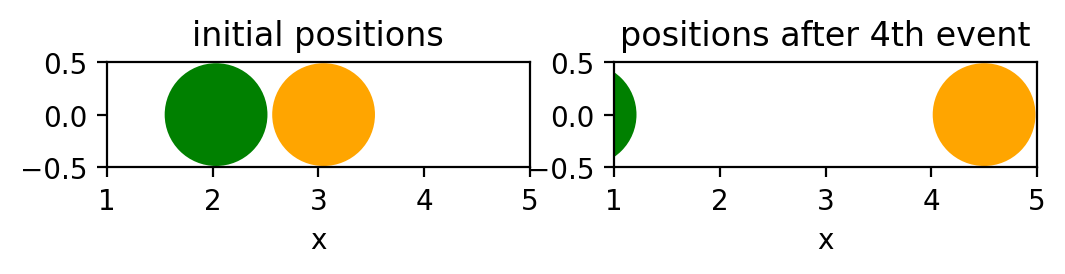

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, dpi = 200, subplot_kw=dict(xlim=(1.,5.),ylim=(-0.5,0.5),aspect='equal',xlabel='x'))

def find_nextEvent():
  # compute list with all collision times with left and right wall
  List_dt_Left =  ( L_xMin+radius - x ) / v_x
  List_dt_Right = ( L_xMax-radius - x ) / v_x
  
  # set all collision times <= 0 to infinity
  List_dt_Left [ List_dt_Left  <= 0] = np.inf
  List_dt_Right[ List_dt_Right <= 0] = np.inf

  # search for the index of the minimum collision time
  index_LeftMinTime = np.argmin(  List_dt_Left )
  index_RightMinTime = np.argmin( List_dt_Right )

  # compare minimum left and right collision time -> return min
  if List_dt_Left[ index_LeftMinTime ] < List_dt_Right[ index_RightMinTime ]:
    return index_LeftMinTime, List_dt_Left[ index_LeftMinTime ]
  else:
    return index_RightMinTime, List_dt_Right[ index_RightMinTime ]

L_xMin, L_xMax = 1.0, 5.0         #dimensions of our box
x = np.array([2.03260381, 3.05])  #positions
v_x = np.array([0.64581578, 0.15])#velocities
radius = np.array([ 0.5, 0.5 ])   #radiai
ax1.scatter( x, np.zeros(2), marker = "o", s = 36**2, c = {'green', 'orange'})# plot initial positions

#0) find first event
particle_index, del_t_nextEvent = find_nextEvent()
for events in range( 4 ):
  #1) move all particles until next collision
  x += v_x*del_t_nextEvent

  #2) update velocity of colliding particle
  v_x[particle_index] *= -1.0

  #3) identify next collision event
  particle_index, del_t_nextEvent = find_nextEvent()

ax2.scatter( x, np.zeros(2), marker = "o", s = 36**2, c = {'green', 'orange'})#plot final positions
ax1.set_title('initial positions')
ax2.set_title('positions after 4th event')
plt.show()

Some more useful numpy hacks:

In [ ]:
print('Remember1 that False == 0:', False == 0)
print('Remember2 that True == 1:', True == 1)

a = np.array([1,2,3,4,5,6])
print('initial a =', a)
print('( a > 4 ) = ', a > 4 )

a[ a < 4 ] += 1
print('changed a =', a)

b = 2*a * ( a > 4 )
print('b = ', b)

You saw in this minimal exapmle, that doing redundant steps comes with the risk of **unintended output**. (Keep this in mind for the future! You don't want to explain to your boss later that your code caused a 10.000€ damage because you where too lazy to connect the math with the physics...)  
For now: Connecting the math of the inter-particle collision times with the physics is essential if you want to pass this TP. So for now you hurt "only" yourself if you are lazy.

# Important remarks on the data structure:


## Wall collisions
Consider the minimal example that you just fixed. You were working with a 1D array of positions and velocities. With numpy it was straightforward to calculate all collision times in one step and store them in a list.  
With numpy, it is equally straightforward to generalize this procedure to two dimensions, where our data structure looks like:
```
pos = [ [x_0, y_0],   [x_1, y_1],   [x_2, y_2]]
vel = [ [vx_0, vy_0], [vx_1, vy_1], [vx_2, vy_2]]
dt_List = [ [ dtx_0, dty_0 ], [ dtx_1, dty_1 ], [ dtx_2, dty_2 ]]
```
Imagine, we identify dtx_1 as the smallest $\Delta t_{\rm event}$.  
We see that dtx_1 has the index dt_List[ **i = 1** ][ **j = 0** ].  
Because the data structure of the dt_List is the same as in pos and vel, the **index of dtx_1 identifies the monomer index $i = 1$ and the wall direction $j = 0$**, i.e. the two information we need to update the velocity after a wall collision.  
Therefore, the taks is **not** to find the smallest time but the task is to **find the index** of the smallest time in dt_List. (Reminder: you have already done it in 1D in the minimal example above!)  
We then store all information in the object next_wall_event:
```
m_i = 1
dir_j = 0
next_wall_event.dt = dt_List[ m_i ][ dir_j ]
next_wall_event.m_1 = m_i
next_wall_event.w_dir = dir_j
```


## Inter-particle collisions


### Monomer collisions
The relevant data structure is
```
pos = [ [x_0, y_0],   [x_1, y_1],   [x_2, y_2]]
vel = [ [vx_0, vy_0], [vx_1, vy_1], [vx_2, vy_2]]
rad = [ r_0, r_1, r_2 ]
```
With this we have to compute a list of all possible collisions, i.e.  
monomer 0 and 1,  
monomer 0 and 2,  
monomer 1 and 2.  
Of course we could work with for-loops to create all possible combinations. However, **for-loops are NOT a good numpy practice**.  
**A good numpy practice is to work with a mask!**  
To explain the working principle we consider a system with $\rm NM$ monomers in two dimensions. In the code below, we:  
1) generate a two-dimensional array of $\rm NM$ random positions  
2) define the mask array "pairs", which is an array containing all index combinations for monomer collisions  


In [ ]:
NM = 5 #number of monomers
Dim = 2 #dimension
pos = np.random.uniform( 0, 5, (NM, Dim) ) #random positions
pairs = np.array(np.array( [ (k,l) for k in range(NM) for l in range( k+1,NM ) ] )) #index combinations
print('pos = ', pos )
print('pairs = ', pairs )

Once we defined the mask "pairs" in our code, we can use it to compute in one line the distance between all pairs and  other relevant quantities with the final goal to obtain a list of collision times for **each pair**.  
To explain the working principle we propose the minimal code below. We compute the distance between all pair and find **the index** of the minimum distance. This index allows us to identify the two corresponding monomers.  
You have to work in a very similar way when you search for the next monomer event.

In [ ]:
m_1 = pairs[:,0]
m_2 = pairs[:,1]
dx_dy_ofPairs = pos[m_1] - pos[m_2]
print("dx_dy_ofPairs = ", dx_dy_ofPairs)

dist_ofPairs = np.linalg.norm(dx_dy_ofPairs, axis=1 )
print("\ndistance between pairs = ", dist_ofPairs)

pairIndex_minDist = np.argmin(dist_ofPairs)
m_i, m_j = pairs[ pairIndex_minDist ]
minDist = dist_ofPairs[ pairIndex_minDist ]
print('\n\nthe monomers closest to each other are: m_i = %d, m_j = %d'% (m_i, m_j))
print('the distance between them is ', minDist)

Don't forget that we store the event information as
```
next_monomer_event.dt = del_t_till_particle_collision
next_monomer_event.m_1 = index_of_involved_particle_1
next_monomer_event.m_2 = index_of_involved_particle_2
```

### Dimer-bond collisions
We clarify the basics of the required data structure for dimer simulations. Consider the two animations below.  
The left simulation consits of a pure monomer system. With the mask array "pairs" it is straight forward to compute all possible collisions between the five monomers.  
In the right simulation we have added two dimers. Again, with the mask array "pairs" we can compute all possible collisions between the five monomers. (Absolutely nothing changes for the computation of collisions between the five monomers!) To take care of the **bond-collision** of the dimers we adapt the same strategy but with a different (additional) mask array "dimer_pairs".    
<figure class="image">
  <img src='https://drive.google.com/uc?id=1fdDlR2YVnlWOJ944D7A14DxJc_feRnUq' alt="{{ include.description }}" alt="drawing" width="400"/>
  <img src='https://drive.google.com/uc?id=1jvCWYGKclvipSfeFb1rM_IpQ00oN-QUN' alt="{{ include.description }}" alt="drawing" width="400"/>
  <figcaption>

Consider the following data structure
```
pos = [ [x_0, y_0],   [x_1, y_1],   [x_2, y_2],   [x_3, y_3],   [x_4, y_4]]
vel = [ [vx_0, vy_0], [vx_1, vy_1], [vx_2, vy_2], [vx_3, vy_3], [vx_4, vy_4]]
rad = [ r_0, r_1, r_2, r_3, r_4 ]
```
For the monomer collisions we define the mask "pairs"
```
pairs = [ [0, 1], [0, 2], [0, 3], [0, 4], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4] ]
```
For the bond collisions of the dimers we define the mask "dimer_pairs"
```
dimer_pairs = [ [0,2], [1,3] ]
```
This mask means, that  
monomer 0 and 2 form a dimer  
monomer 1 and 3 form a dimer  

You may find it more intuitive to pair [0,1] and [2,3]. There is no real importance on the order and you may choose your preference.

This new mask allows us now to compute the list containing all possible bond collisions in a very compact way. Below, we define the dimer_pair array and repete the example of the calculation of the minimum distance. (Exept for using a different mask, the code is essentially identical. ;-) )

In [ ]:
ND = 2 #number of Dimers
assert(2*ND <= NM)
dimer_pairs = np.array([[k,ND+k] for k in range(ND)])
print('dimer_pairs =', dimer_pairs)

In [ ]:
m_1 = dimer_pairs[:,0]
m_2 = dimer_pairs[:,1]
dx_dy_ofDimer = pos[m_1] - pos[m_2]
print("dx_dy_ofDimer = ", dx_dy_ofDimer)

dist_Dimer = np.linalg.norm(dx_dy_ofDimer, axis=1 )
print("\ndistance between dimer pairs = ", dist_Dimer)

dimerIndex_minDist = np.argmin(dist_Dimer)
m_i, m_j = dimer_pairs[ dimerIndex_minDist ]
minDist = dist_Dimer[ dimerIndex_minDist ]
print('\n\nthe monomers forming a dimer closest to each other are: m_i = %d, m_j = %d'% (m_i, m_j))
print('the distance between them is ', minDist)

Don't forget that we store the event information as
```
next_dimer_event.dt = del_t_till_particle_collision
next_dimer_event.m_1 = index_of_involved_particle_1
next_dimer_event.m_2 = index_of_involved_particle_2
```

# Road map:

Nowadays coding is often teamwork. Several people contribute pieces of code to a big project. Our goal is to prepare you in the best possible way for your professional career. This TP is therefore constructed as a collaborative project.  
You will be using **git**, a software for tracking changes in any set of files, usually used for coordinating work among programmers collaboratively developing source code during software development.  
This may sound scary, but you will make use of the intuitive tools provided by **GitHub, Inc.** (a company). **GitHub** is a Git-repository hosting service, but it adds many of its own features (you may feel free to explore). 

You are working in binomes (student A and student B)! Here is your rode map:  
**1)** Read this notebook and work through the tasks. (A and B)

**2)** A and B work together on the same code to implement first the wall collisions and the simulation in constant time steps. You share your result on github.  

**3a)** A implements the "external" monomer collisions and shares the result on github.  
**3b)** B implements the "internal" dimer-bond collisions and shares the result on github.  

Remark for **3)**:  
The monomer class contains a function compute_next_event(...).  
For step **2)** the dimer class could use the same function defined in the monomer class. This is not possible anymore for step **3)**.  
For the monomers compute_next_event(...) must compute the wall times and the times for "external" collisions.  
For the dimers we need a function compute_next_event(...) which computes the wall times and the "internal" collsions.   
Remember: In python it is possible to define a function in the child class, which overwrites the function in the parent class. You can find a very simple example [here](https://www.tutorialspoint.com/How-to-override-class-methods-in-Python) and a more elaborate explaination   [here](https://www.geeksforgeeks.org/method-overriding-in-python/). This means you can redefine the function compute_next_event(...) in the dimer class.
 
**4)** A and B work together on the same code to fusion the two contributions to a simulation with "external" and "internal" collisions, i.e. a simulation of dimers with hard cores.

Until now you have worked with initial configurations we provided to you.  
**5a)** A contributes a function which initializes a pure monomer system. It should be a **private function of the class**.  
**5b)** B contributes a function which initializes a pure dimer system (with hard cores this time). It should be a **private function of the class**.

**6)** A and B combine both solutions, such that you can initialize a system with dimers and additional unbond/free monomers.

**7)** Finally your code should save the final configuration it generates, such that you can reload the configuration to continue the simulation at any point in the future.

We expect a code where we can: 

**1)** Initialize a system with a number of monomers and dimers of our choice. We want to be able to choose the size of the simulation box to tune the density. (Ideally we can also choose the size and density of the particles.)

**2)** The simulation should start from a previously saved configuration if it exists, otherwise it must create a new initial configuration.


Once you obtained the desired result it's time to submit the code for evaluation (part 1) and to choose a project you want to work on. We will provide you with a number of ideas. You will have to write a short report on your project which will be evaluated as well (part 2).

Outline of the report:  
- Describe the physical system you study
- Formulate the question you are addressing
- Explain your approach to answer your question
- Present your results in the form of figures and interprete them in a coherent text (proper scientific figures with labels and legends)
- Summary of final conclusions
- References if you used any